# 神经网络实现sin函数拟合

In [1]:
import torch
from torch import nn


In [2]:
class SinNetwork(nn.Module):

    # initialize the network with the number m of hidden units
    def __init__(self, m):
        super().__init__()
        # layer1 is a linear layer with 1 input and m outputs, 1*m
        self.hidden = nn.Linear(1, m)
        # layer2 is a linear layer with m inputs and 1 output, m*1
        self.out = nn.Linear(m, 1)

    # define the forward pass
    def forward(self, x):
        # apply the hidden layer and the sigmoid activation function
        x = self.hidden(x)
        x = torch.sigmoid(x)
        # apply the output layer
        x = self.out(x)
        return x

In [3]:
model = SinNetwork(6)
print(model)
print("")

SinNetwork(
  (hidden): Linear(in_features=1, out_features=6, bias=True)
  (out): Linear(in_features=6, out_features=1, bias=True)
)



In [4]:
for name, param in model.named_parameters():
    print(f"{name}: {param.data.shape}")
print("")

hidden.weight: torch.Size([6, 1])
hidden.bias: torch.Size([6])
out.weight: torch.Size([1, 6])
out.bias: torch.Size([1])



In [5]:
x = torch.zeros([100, 1])
h = model(x)

print(f"x: {x.shape}")
print(f"h: {h.shape}")

x: torch.Size([100, 1])
h: torch.Size([100, 1])


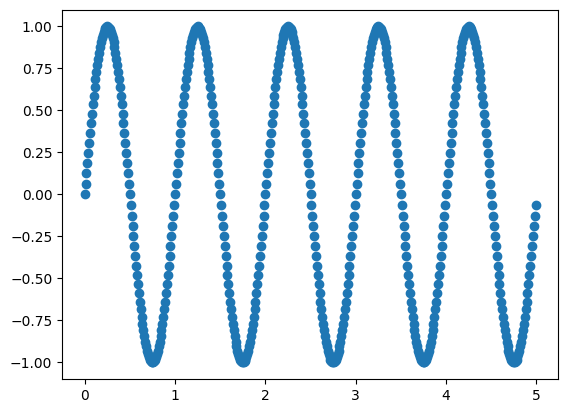

In [6]:
from matplotlib import pyplot as plt
import numpy as np

x = np.arange(0.0, 5.0, 0.01)
y = np.sin(2 * np.pi * x)

x0 = x = x.reshape(500, 1)
y0 = y = y.reshape(500, 1)

plt.scatter(x, y)



In [7]:
x = torch.Tensor(x) 
y = torch.Tensor(y)

model = SinNetwork(32)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # adam? 0.001?

In [8]:
for epoch in range(50000):
    optimizer.zero_grad()
    output = model(x)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 5000 == 0:
        print(f"Epoch {epoch+1} Loss {loss.data:.4f}")

Epoch 5000 Loss 0.3750
Epoch 10000 Loss 0.2546
Epoch 15000 Loss 0.1369
Epoch 20000 Loss 0.0254
Epoch 25000 Loss 0.0072
Epoch 30000 Loss 0.0018
Epoch 35000 Loss 0.0008
Epoch 40000 Loss 0.0006
Epoch 45000 Loss 0.0004
Epoch 50000 Loss 0.0004


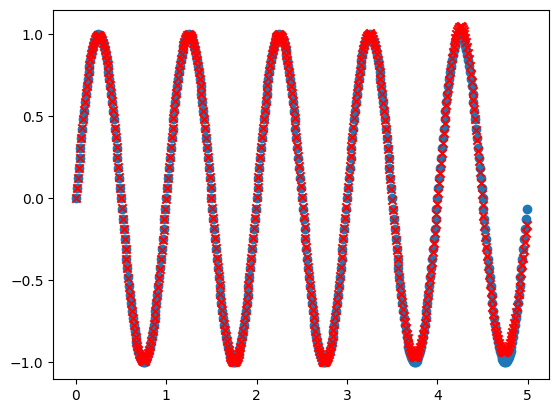

In [9]:
h = model(x)
x = x.data.numpy()
h = h.data.numpy()
plt.scatter(x0, y0)
plt.scatter(x, h, color='red', marker='x')
plt.show()

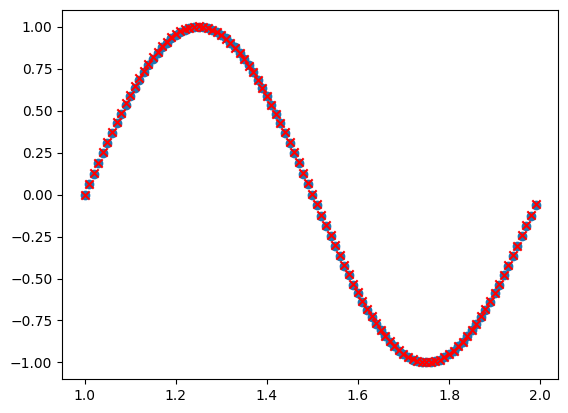

In [10]:
x = np.arange(1.0, 2.0, 0.01)
y = np.sin(2 * np.pi * x)

x = x.reshape(100, 1)
y = y.reshape(100, 1)

plt.scatter(x, y)
x = torch.Tensor(x)
y = torch.Tensor(y)
h = model(x)
x = x.data.numpy()
h = h.data.numpy()
plt.scatter(x, h, color='red', marker='x')

plt.show()